In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [30]:
shp_path = "./us_data/tl_2017_us_state.shp"
sf = shp.Reader(shp_path)

shp_tut_path="./tut/Comuna.shp"
sf_tut = shp.Reader(shp_tut_path)

In [34]:
print(len(sf.shapes()),
len(sf_tut.shapes()))

56 52


In [27]:
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    
    return df

In [36]:
df = read_shapefile(sf)
print(df.shape)

df_tut = read_shapefile(sf_tut)
print(df_tut.shape)

(56, 15)
(52, 7)


In [96]:
df.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,coords
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"[(-81.747254, 39.095379), (-81.746354, 39.0965..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"[(-82.987477, 24.625379), (-82.987477, 24.6254..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"[(-91.185295, 40.637803), (-91.1751, 40.643027..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"[(-96.784381, 46.630503999999995), (-96.784337..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"[(-77.45880799999999, 39.22027), (-77.45866099..."


In [146]:
def state_to_id(state):
    print(state)
    return df[df.NAME == state].index.values[0]

In [147]:
def plot_shape(id, s=None):
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points), 1))
    y_lat = np.zeros((len(shape_ex.points), 1))
    
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
        
    plt.plot(x_lon, y_lat)
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    plt.xlim(shape_ex.bbox[0], shape_ex.bbox[2])
    return x0, y0

Washington
19


(-119.75672952512912, 47.198394660536586)

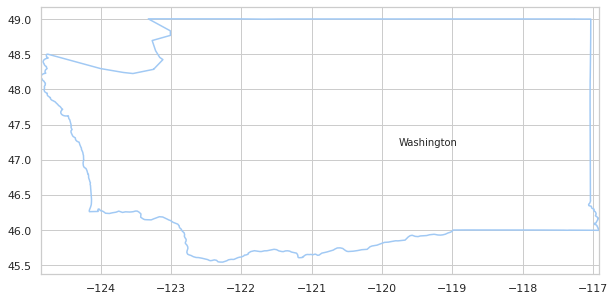

In [152]:
state = 'Washington'
# state_id = df[df.NAME == state].index.values[0]
state_id = state_to_id(state)
print(state_id)
plot_shape(state_id, state)

In [166]:
def plot(title, ids, sf, x_lim=None, y_lim=None, figsize=(11,9), color='r'):
       
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle(title, fontsize=16)
    
    no_print = [40, 31, 41, 35, 36, 49, 34]

    s_id = 0
    for shape in sf.shapeRecords():
        if(s_id not in no_print):
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            plt.plot(x, y, 'k')
        s_id = s_id + 1

    for id in ids:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon, y_lat, color)
        
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

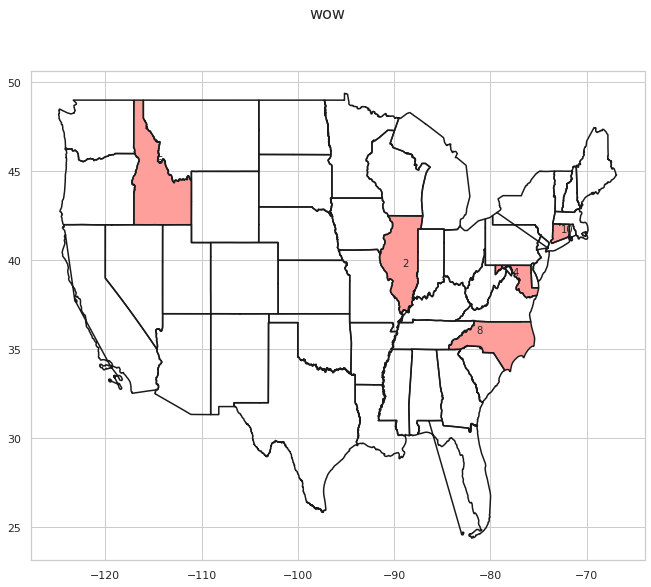

In [169]:
plot('wow', [2,4,6,8,10], sf)

In [197]:
def calc_color(data, color=None):
    
    if color == 1:
        color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0', '#807dbaF0','#6a51a3F0','#54278fF0']; 
        colors = 'Purples';
    elif color == 2: 
        color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; 
        colors = 'YlGnBu';
    elif color == 3: 
        color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; 
        colors = 'Greys';
    elif color == 9: 
        color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
    else:            
        color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; 
        colors = 'YlOrBr';
    
    new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
    color_ton = []
    
    for val in new_data:
        color_ton.append(color_sq[val]) 
    if color != 9:
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.6);
        return color_ton, bins;

In [198]:
def plot_states_data(sf, title, states, data=None, color=None, print_id=False):
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    state_id = []
    for i in states:
        state_id.append(df[df.NAME == i].index.values[0])
    plot_map_fill_multiple_ids_tone(sf, title, state_id, print_id, color_ton, bins, x_lim = None, y_lim = None, figsize=(11,9))

In [199]:
def plot_map_fill_multiple_ids_tone(sf, title, state, print_id, color_ton, bins, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize=figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    
    no_print = [40, 31, 41, 35, 36, 49, 34]
    
    s_id = 0
    for shape in sf.shapeRecords():
        if(s_id not in no_print):
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            ax.plot(x, y, 'k')
        s_id = s_id + 1
            
    
        for id in state:
            shape_ex = sf.shape(id)
            x_lon = np.zeros((len(shape_ex.points),1))
            y_lat = np.zeros((len(shape_ex.points),1))
            for ip in range(len(shape_ex.points)):
                x_lon[ip] = shape_ex.points[ip][0]
                y_lat[ip] = shape_ex.points[ip][1]
            ax.fill(x_lon,y_lat, color_ton[state.index(id)])
            if print_id != False:
                x0 = np.mean(x_lon)
                y0 = np.mean(y_lat)
                plt.text(x0, y0, id, fontsize=10)
        if (x_lim != None) & (y_lim != None):     
            plt.xlim(x_lim)
            plt.ylim(y_lim)
        

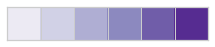

<Figure size 792x648 with 0 Axes>

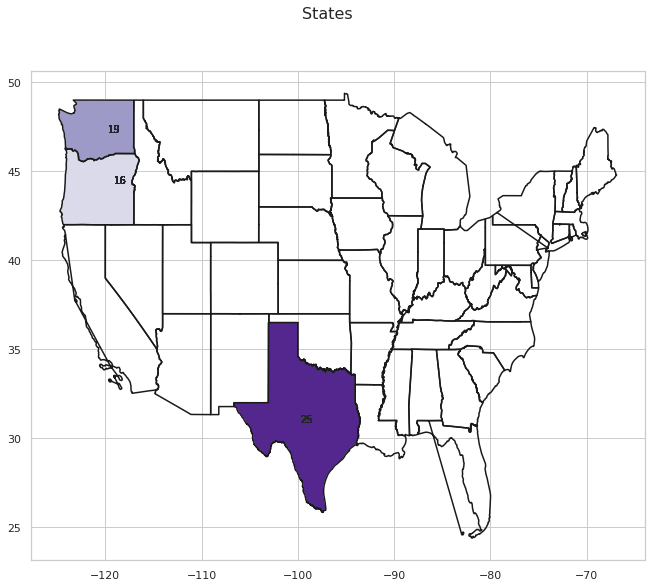

In [200]:
states = ['Oregon', 'Washington', 'Texas']
data = [100, 345, 34553]
color_pallete = 1

plot_states_data(sf, 'States', states, data, color_pallete, True)

In [223]:
import csv
import datetime

In [224]:
def get_date(s):
    dto = datetime.datetime.strptime(s, '%Y-%m-%d')
    return dto

In [246]:
def parse_covid(file):
    dates = []
    with open(file) as cf:
        cols = []
        cr = csv.reader(cf, delimiter=',')
        
        lc = 0
        prev_date = get_date('2019-12-30')
        i = 0

        for r in cr:
            if lc == 0:
                cols = r
                print(f'{cols}')
                lc += 1
            else:
                date = r[0]
                
                # Next Day
                if get_date(date) > prev_date:
                    prev_date = get_date(date)
                    dates.append([])
                    dates[i].append([r[1], r[3]])
                    
                    i += 1
                # Same day
                else:
                    print(i)
                    dates[i].append([r[1], r[3]])
                lc += 1
        print(f'Procewssed {lc} lines')
        return dates

In [247]:
cases = parse_covid('us-states-covid.csv')

['date', 'state', 'fips', 'cases', 'deaths']
4


IndexError: list index out of range

In [236]:
cases

[[['Washington', '1'],
  ['Washington', '1'],
  ['Illinois', '1'],
  ['Washington', '1'],
  ['California', '2'],
  ['Illinois', '1'],
  ['Washington', '1'],
  ['California', '2'],
  ['Illinois', '1'],
  ['Washington', '1'],
  ['California', '2'],
  ['Illinois', '1'],
  ['Washington', '1'],
  ['California', '2'],
  ['Illinois', '1'],
  ['Washington', '1'],
  ['California', '2'],
  ['Illinois', '2'],
  ['Washington', '1'],
  ['California', '3'],
  ['Illinois', '2'],
  ['Washington', '1'],
  ['California', '3'],
  ['Illinois', '2'],
  ['Massachusetts', '1'],
  ['Washington', '1'],
  ['California', '6'],
  ['Illinois', '2'],
  ['Massachusetts', '1'],
  ['Washington', '1'],
  ['California', '6'],
  ['Illinois', '2'],
  ['Massachusetts', '1'],
  ['Washington', '1'],
  ['California', '6'],
  ['Illinois', '2'],
  ['Massachusetts', '1'],
  ['Washington', '1'],
  ['California', '6'],
  ['Illinois', '2'],
  ['Massachusetts', '1'],
  ['Washington', '1'],
  ['Wisconsin', '1'],
  ['California', '6']

In [237]:
cases[0]

[['Washington', '1'],
 ['Washington', '1'],
 ['Illinois', '1'],
 ['Washington', '1'],
 ['California', '2'],
 ['Illinois', '1'],
 ['Washington', '1'],
 ['California', '2'],
 ['Illinois', '1'],
 ['Washington', '1'],
 ['California', '2'],
 ['Illinois', '1'],
 ['Washington', '1'],
 ['California', '2'],
 ['Illinois', '1'],
 ['Washington', '1'],
 ['California', '2'],
 ['Illinois', '2'],
 ['Washington', '1'],
 ['California', '3'],
 ['Illinois', '2'],
 ['Washington', '1'],
 ['California', '3'],
 ['Illinois', '2'],
 ['Massachusetts', '1'],
 ['Washington', '1'],
 ['California', '6'],
 ['Illinois', '2'],
 ['Massachusetts', '1'],
 ['Washington', '1'],
 ['California', '6'],
 ['Illinois', '2'],
 ['Massachusetts', '1'],
 ['Washington', '1'],
 ['California', '6'],
 ['Illinois', '2'],
 ['Massachusetts', '1'],
 ['Washington', '1'],
 ['California', '6'],
 ['Illinois', '2'],
 ['Massachusetts', '1'],
 ['Washington', '1'],
 ['Wisconsin', '1'],
 ['California', '6'],
 ['Illinois', '2'],
 ['Massachusetts', '1'